In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import pycountry
import seaborn as sns
import numpy as np

In [2]:
paths = glob.glob("data/*joint*")
print(paths)
df_master = pd.read_sas(paths[0])


['data/EVS_WVS_CrossNat_W7_joint_v1_4.sas7bdat']


In [3]:
df = df_master.copy()

df["B_COUNTRY_ALPHA"] = df[["B_COUNTRY_ALPHA"]].applymap(lambda x: x.decode("UTF-8"))
df = df.rename(columns = {"B_COUNTRY_ALPHA":"COUNTRY_CODE"})

df = df.drop(df.columns[:3], axis = 1)
df = df.drop(df.columns[1:20], axis = 1)
df = df.iloc[1:-1]

In [4]:
df

COUNTRY_CODE   Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  ...  \
1               ALB  1.0  1.0  4.0  4.0  1.0  1.0  1.0  2.0  2.0  ...   
2               ALB  1.0  2.0  2.0  4.0  1.0  1.0  1.0  2.0  1.0  ...   
3               ALB  1.0  2.0  2.0  4.0  1.0  2.0  1.0  2.0  1.0  ...   
4               ALB  1.0  1.0  2.0  4.0  1.0  3.0  1.0  2.0  2.0  ...   
5               ALB  1.0  3.0  3.0  4.0  1.0  2.0  1.0  2.0  2.0  ...   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
124848          USA  1.0  1.0  2.0  3.0  1.0  2.0  1.0  1.0  2.0  ...   
124849          USA  1.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0  2.0  ...   
124850          USA  1.0  1.0  2.0  3.0  2.0  3.0  2.0  1.0  1.0  ...   
124851          USA  1.0  1.0  2.0  4.0  3.0  3.0  2.0  1.0  1.0  ...   
124852          USA  1.0  1.0  2.0  3.0  2.0  4.0  1.0  1.0  1.0  ...   

        WVS_Polmistrust_PartyVoter  WVS_LR_MedianVoter  \
1                        80.098794                5.33   
2                        75.400315                5.33   
3                        75.400315                5.33   
4                        80.098794                5.33   
5                              NaN                 NaN   
...                            ...                 ...   
124848                         NaN                 NaN   
124849                         NaN                 NaN   
124850                         NaN                 NaN   
124851                         NaN                 NaN   
124852                         NaN                 NaN   

        WVS_LibCon_MedianVoter  v2psbars  v2psorgs  v2psprbrch  v2psprlnks  \
1                       7.5767     1.471    -0.444       0.157      -0.622   
2                       7.5767     1.471    -0.444       0.157      -0.622   
3                       7.5767     1.471    -0.444       0.157      -0.622   
4                       7.5767     1.471    -0.444       0.157      -0.622   
5                          NaN       NaN       NaN         NaN         NaN   
...                        ...       ...       ...         ...         ...   
124848                     NaN       NaN       NaN         NaN         NaN   
124849                     NaN       NaN       NaN         NaN         NaN   
124850                     NaN       NaN       NaN         NaN         NaN   
124851                     NaN       NaN       NaN         NaN         NaN   
124852                     NaN       NaN       NaN         NaN         NaN   

        v2psplats  v2xnp_client  v2xps_party  
1           0.475          0.79        0.446  
2           0.475          0.79        0.446  
3           0.475          0.79        0.446  
4           0.475          0.79        0.446  
5             NaN           NaN          NaN  
...           ...           ...          ...  
124848        NaN           NaN          NaN  
124849        NaN           NaN          NaN  
124850        NaN           NaN          NaN  
124851        NaN           NaN          NaN  
124852        NaN           NaN          NaN  

[124852 rows x 371 columns]

In [5]:
def alpha_to_name(alpha):
    return pycountry.countries.get(alpha_3 = alpha).name

In [6]:
df.columns

Index(['COUNTRY_CODE', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       ...
       'WVS_Polmistrust_PartyVoter', 'WVS_LR_MedianVoter',
       'WVS_LibCon_MedianVoter', 'v2psbars', 'v2psorgs', 'v2psprbrch',
       'v2psprlnks', 'v2psplats', 'v2xnp_client', 'v2xps_party'],
      dtype='object', length=371)

In [7]:
Q_columns = df.columns[1:183] #Raw question columns
D_columns = df.columns[184:220] #Derived data columns


In [8]:
df_D = df[D_columns].copy()
df_D['COUNTRY_CODE'] = pd.Series(df['COUNTRY_CODE'])

df_Q = df[Q_columns].copy()

In [9]:
for col in df_D.columns:
    d = df_D[col]
    nancount = len(d) - d.count()
    shittiness = nancount/d.count()
    print(f"{col}: nan rate = {shittiness:.3f}")

Y002: nan rate = 0.052
Y003: nan rate = 0.023
SACSECVAL: nan rate = 0.008
RESEMAVAL: nan rate = 0.015
I_AUTHORITY: nan rate = 0.047
I_NATIONALISM: nan rate = 0.042
I_DEVOUT: nan rate = 0.030
DEFIANCE: nan rate = 0.011
I_RELIGIMP: nan rate = 0.011
I_RELIGBEL: nan rate = 0.032
I_RELIGPRAC: nan rate = 0.010
DISBELIEF: nan rate = 0.006
I_NORM1: nan rate = 0.032
I_NORM2: nan rate = 0.013
I_NORM3: nan rate = 0.011
RELATIVISM: nan rate = 0.009
I_TRUSTARMY: nan rate = 0.057
I_TRUSTPOLICE: nan rate = 0.023
I_TRUSTCOURTS: nan rate = 0.041
SCEPTICISM: nan rate = 0.023
I_INDEP: nan rate = 0.013
I_IMAGIN: nan rate = 0.017
I_NONOBED: nan rate = 0.017
AUTONOMY: nan rate = 0.016
I_WOMJOB: nan rate = 0.009
I_WOMPOL: nan rate = 0.033
I_WOMEDU: nan rate = 0.018
EQUALITY: nan rate = 0.011
I_HOMOLIB: nan rate = 0.062
I_ABORTLIB: nan rate = 0.027
I_DIVORLIB: nan rate = 0.021
CHOICE: nan rate = 0.021
I_VOICE1: nan rate = 0.044
I_VOICE2: nan rate = 0.054
I_VOI2_00: nan rate = 0.068
VOICE: nan rate = 0.031
COU

In [10]:
df_R = df[['COUNTRY_CODE',"SACSECVAL","RESEMAVAL","DEFIANCE", "DISBELIEF","RELATIVISM","SCEPTICISM","AUTONOMY","EQUALITY","CHOICE","VOICE"]].dropna()

# Idea:
### 1: Linear SVM 2 countries, get the resulting normal vec. Then remove that component, do SVM again and get 2nd normal vec. Then plot the projections.

### 2: Use an SVM to get most useful components for separation. l1 norm. Reduce DS to just those questions. 

In [11]:
df_D

Y002  Y003  SACSECVAL  RESEMAVAL  I_AUTHORITY  I_NATIONALISM  \
1        2.0   1.0   0.235833   0.526944          0.0           0.00   
2        1.0   1.0   0.125000   0.388889          0.0           0.00   
3        2.0  -1.0   0.276667   0.406991          0.0           0.00   
4        2.0   0.0   0.220833   0.330324          0.0           0.00   
5        2.0  -1.0   0.402500   0.399630          0.0           0.00   
...      ...   ...        ...        ...          ...            ...   
124848   2.0   1.0   0.610278   0.492639          0.5           0.00   
124849   2.0  -2.0   0.276667   0.455602          0.0           0.00   
124850   NaN   1.0   0.303333   0.831944          0.0           0.00   
124851   3.0   1.0   0.470833   0.923611          0.0           0.33   
124852   3.0   1.0   0.512500   0.796296          0.5           0.66   

        I_DEVOUT  DEFIANCE  I_RELIGIMP  I_RELIGBEL  ...  EQUALITY  I_HOMOLIB  \
1           0.00  0.000000        0.00         0.0  ...  1.000000   0.444444   
2           0.00  0.000000        0.00         0.0  ...  1.000000   0.000000   
3           0.00  0.000000        0.33         0.0  ...  0.833333   0.000000   
4           0.00  0.000000        0.66         0.0  ...  0.526667   0.000000   
5           0.00  0.000000        0.33         0.0  ...  0.500000   0.000000   
...          ...       ...         ...         ...  ...       ...        ...   
124848      0.00  0.166667        0.33         1.0  ...  0.916667   0.555556   
124849      1.00  0.333333        0.00         0.0  ...  0.916667   1.000000   
124850      0.33  0.110000        0.66         0.0  ...  0.720000   0.777778   
124851      0.33  0.220000        0.66         1.0  ...  0.916667   1.000000   
124852      0.00  0.386667        1.00         1.0  ...  0.916667   1.000000   

        I_ABORTLIB  I_DIVORLIB    CHOICE  I_VOICE1  I_VOICE2  I_VOI2_00  \
1         0.444444    0.444444  0.444444      0.66       0.0      0.330   
2         0.222222    0.444444  0.222222      0.00       0.0      0.000   
3         0.444444    0.444444  0.296296      0.33       0.0      0.165   
4         0.444444    0.444444  0.296296      0.33       0.0      0.165   
5         0.222222    0.333333  0.185185      0.66       0.5      0.580   
...            ...         ...       ...       ...       ...        ...   
124848    0.444444    0.666667  0.555556      0.33       0.0      0.165   
124849    0.444444    0.777778  0.740741      0.33       0.0      0.165   
124850    0.777778    0.777778  0.777778      0.66       1.0      0.830   
124851    0.888889    0.444444  0.777778      1.00       1.0      1.000   
124852    0.777778    0.777778  0.851852      1.00       0.5      0.750   

        VOICE  COUNTRY_CODE  
1       0.330           ALB  
2       0.000           ALB  
3       0.165           ALB  
4       0.165           ALB  
5       0.580           ALB  
...       ...           ...  
124848  0.165           USA  
124849  0.165           USA  
124850  0.830           USA  
124851  1.000           USA  
124852  0.750           USA  

[124852 rows x 37 columns]

In [12]:
df_D.columns

Index(['Y002', 'Y003', 'SACSECVAL', 'RESEMAVAL', 'I_AUTHORITY',
       'I_NATIONALISM', 'I_DEVOUT', 'DEFIANCE', 'I_RELIGIMP', 'I_RELIGBEL',
       'I_RELIGPRAC', 'DISBELIEF', 'I_NORM1', 'I_NORM2', 'I_NORM3',
       'RELATIVISM', 'I_TRUSTARMY', 'I_TRUSTPOLICE', 'I_TRUSTCOURTS',
       'SCEPTICISM', 'I_INDEP', 'I_IMAGIN', 'I_NONOBED', 'AUTONOMY',
       'I_WOMJOB', 'I_WOMPOL', 'I_WOMEDU', 'EQUALITY', 'I_HOMOLIB',
       'I_ABORTLIB', 'I_DIVORLIB', 'CHOICE', 'I_VOICE1', 'I_VOICE2',
       'I_VOI2_00', 'VOICE', 'COUNTRY_CODE'],
      dtype='object')

In [13]:
df_R #Reduced

COUNTRY_CODE  SACSECVAL  RESEMAVAL  DEFIANCE  DISBELIEF  RELATIVISM  \
1               ALB   0.235833   0.526944  0.000000   0.166667    0.666667   
2               ALB   0.125000   0.388889  0.000000   0.166667    0.000000   
3               ALB   0.276667   0.406991  0.000000   0.443333    0.000000   
4               ALB   0.220833   0.330324  0.000000   0.553333    0.000000   
5               ALB   0.402500   0.399630  0.000000   0.276667    0.333333   
...             ...        ...        ...       ...        ...         ...   
124848          USA   0.610278   0.492639  0.166667   0.721111    1.000000   
124849          USA   0.276667   0.455602  0.333333   0.333333    0.000000   
124850          USA   0.303333   0.831944  0.110000   0.553333    0.000000   
124851          USA   0.470833   0.923611  0.220000   0.886667    0.666667   
124852          USA   0.512500   0.796296  0.386667   1.000000    0.333333   

        SCEPTICISM  AUTONOMY  EQUALITY    CHOICE  VOICE  
1         0.110000  0.333333  1.000000  0.444444  0.330  
2         0.333333  0.333333  1.000000  0.222222  0.000  
3         0.663333  0.333333  0.833333  0.296296  0.165  
4         0.330000  0.333333  0.526667  0.296296  0.165  
5         1.000000  0.333333  0.500000  0.185185  0.580  
...            ...       ...       ...       ...    ...  
124848    0.553333  0.333333  0.916667  0.555556  0.165  
124849    0.440000  0.000000  0.916667  0.740741  0.165  
124850    0.550000  1.000000  0.720000  0.777778  0.830  
124851    0.110000  1.000000  0.916667  0.777778  1.000  
124852    0.330000  0.666667  0.916667  0.851852  0.750  

[112630 rows x 11 columns]

In [14]:
df_R["COUNTRY_CODE"].unique()

array(['ALB', 'AND', 'AZE', 'ARG', 'AUS', 'AUT', 'BGD', 'ARM', 'BOL',
       'BIH', 'BRA', 'BGR', 'MMR', 'BLR', 'CHL', 'CHN', 'TWN', 'COL',
       'HRV', 'CYP', 'CZE', 'DNK', 'ECU', 'ETH', 'EST', 'FIN', 'FRA',
       'GEO', 'DEU', 'GRC', 'HKG', 'HUN', 'ISL', 'IDN', 'IRN', 'IRQ',
       'ITA', 'JPN', 'KAZ', 'JOR', 'KOR', 'KGZ', 'LBN', 'LTU', 'MAC',
       'MYS', 'MEX', 'MNE', 'NLD', 'NZL', 'NIC', 'NGA', 'NOR', 'PAK',
       'PER', 'PHL', 'POL', 'PRI', 'ROU', 'RUS', 'SRB', 'SVK', 'VNM',
       'SVN', 'ZWE', 'ESP', 'SWE', 'CHE', 'TJK', 'THA', 'TUN', 'TUR',
       'MKD', 'GBR', 'USA'], dtype=object)

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [16]:
svc = SVC(C = 0.1)

X = df_R.drop(columns = ["COUNTRY_CODE"])
# Y = ohe.fit_transform(df_R[["COUNTRY_CODE"]])
Y = df_R["COUNTRY_CODE"]


# cross_val_score(svc, X, Y)

In [17]:
Y[:10000].unique()

array(['ALB', 'AND', 'AZE', 'ARG', 'AUS', 'AUT', 'BGD', 'ARM'],
      dtype=object)

In [18]:
df_R.drop(columns = ["COUNTRY_CODE"])

SACSECVAL  RESEMAVAL  DEFIANCE  DISBELIEF  RELATIVISM  SCEPTICISM  \
1        0.235833   0.526944  0.000000   0.166667    0.666667    0.110000   
2        0.125000   0.388889  0.000000   0.166667    0.000000    0.333333   
3        0.276667   0.406991  0.000000   0.443333    0.000000    0.663333   
4        0.220833   0.330324  0.000000   0.553333    0.000000    0.330000   
5        0.402500   0.399630  0.000000   0.276667    0.333333    1.000000   
...           ...        ...       ...        ...         ...         ...   
124848   0.610278   0.492639  0.166667   0.721111    1.000000    0.553333   
124849   0.276667   0.455602  0.333333   0.333333    0.000000    0.440000   
124850   0.303333   0.831944  0.110000   0.553333    0.000000    0.550000   
124851   0.470833   0.923611  0.220000   0.886667    0.666667    0.110000   
124852   0.512500   0.796296  0.386667   1.000000    0.333333    0.330000   

        AUTONOMY  EQUALITY    CHOICE  VOICE  
1       0.333333  1.000000  0.444444  0.330  
2       0.333333  1.000000  0.222222  0.000  
3       0.333333  0.833333  0.296296  0.165  
4       0.333333  0.526667  0.296296  0.165  
5       0.333333  0.500000  0.185185  0.580  
...          ...       ...       ...    ...  
124848  0.333333  0.916667  0.555556  0.165  
124849  0.000000  0.916667  0.740741  0.165  
124850  1.000000  0.720000  0.777778  0.830  
124851  1.000000  0.916667  0.777778  1.000  
124852  0.666667  0.916667  0.851852  0.750  

[112630 rows x 10 columns]

In [19]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

In [20]:
from sklearn.manifold import TSNE

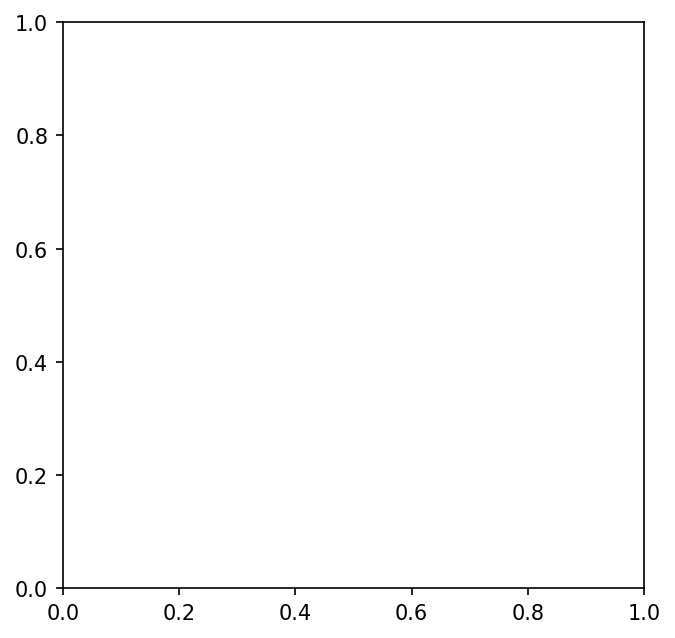

In [101]:
fig = plt.figure(figsize = (5,5), dpi = 150)
ax = fig.add_subplot(111)

lle = LLE(n_neighbors = 10)
tsne = TSNE()

X_lle = lle.fit_transform(X)
X_tsne = tsne.fit_transform(X)

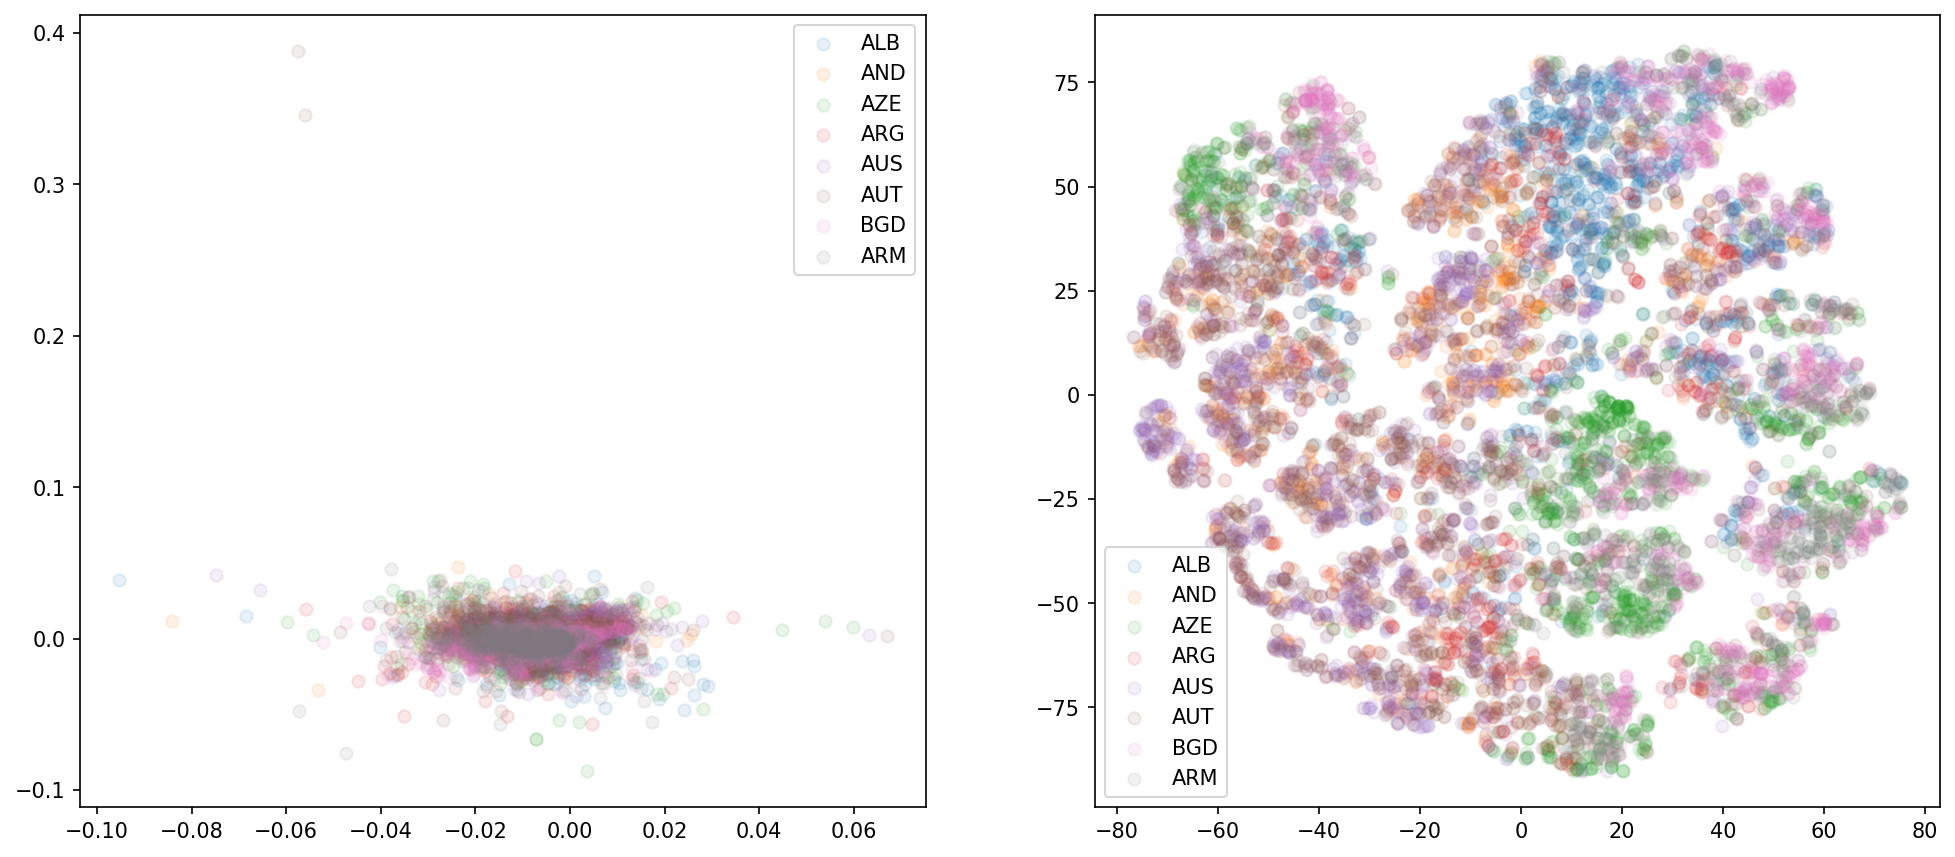

In [105]:
fig = plt.figure(figsize = (16,7), dpi = 150)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for country in Y.unique():
    d_lle = X_lle[Y == country]
    d_tsne = X_tsne[Y == country]
    
    ax1.scatter(d_lle[:,0],d_lle[:,1], label = country, alpha = 0.1)
    ax2.scatter(d_tsne[:,0],d_tsne[:,1], label = country, alpha = 0.1)

ax1.legend()
ax2.legend()

1        ALB
2        ALB
3        ALB
4        ALB
5        ALB
        ... 
10571    ARM
10572    ARM
10573    ARM
10574    ARM
10575    ARM
Name: COUNTRY_CODE, Length: 10000, dtype: object

In [110]:
USA_or_GBR = Y.isin(["GBR","USA"])

In [119]:
svc = SVC(C = 1)
cross_val_score(svc, X[USA_or_GBR], Y[USA_or_GBR])

array([0.71024735, 0.68160377, 0.64976415, 0.68042453, 0.5884434 ])

In [34]:
df_Q['COUNTRY_CODE'] = df['COUNTRY_CODE'].copy()

In [36]:
df_Q

Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  Q10  ...  Q277R  Q278  \
1       1.0  1.0  4.0  4.0  1.0  1.0  1.0  2.0  2.0  1.0  ...    1.0   0.0   
2       1.0  2.0  2.0  4.0  1.0  1.0  1.0  2.0  1.0  1.0  ...    1.0   0.0   
3       1.0  2.0  2.0  4.0  1.0  2.0  1.0  2.0  1.0  1.0  ...    2.0   3.0   
4       1.0  1.0  2.0  4.0  1.0  3.0  1.0  2.0  2.0  1.0  ...    2.0   2.0   
5       1.0  3.0  3.0  4.0  1.0  2.0  1.0  2.0  2.0  1.0  ...    2.0   2.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   ...   
124848  1.0  1.0  2.0  3.0  1.0  2.0  1.0  1.0  2.0  2.0  ...    2.0   NaN   
124849  1.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0  2.0  1.0  ...    NaN   NaN   
124850  1.0  1.0  2.0  3.0  2.0  3.0  2.0  1.0  1.0  2.0  ...    1.0   0.0   
124851  1.0  1.0  2.0  4.0  3.0  3.0  2.0  1.0  1.0  2.0  ...    2.0   3.0   
124852  1.0  1.0  2.0  3.0  2.0  4.0  1.0  1.0  1.0  1.0  ...    4.0   8.0   

        Q278R  Q279  Q280  Q284  Q288  Q288R  Q289  COUNTRY_CODE  
1         1.0   3.0   3.0   NaN   1.0    1.0   5.0           ALB  
2         1.0   4.0   4.0   NaN   4.0    2.0   5.0           ALB  
3         2.0   5.0   7.0   NaN   1.0    1.0   5.0           ALB  
4         2.0   7.0   7.0   NaN   NaN    NaN   5.0           ALB  
5         2.0   7.0   5.0   2.0   2.0    1.0   5.0           ALB  
...       ...   ...   ...   ...   ...    ...   ...           ...  
124848    NaN   7.0   NaN   1.0   9.0    3.0   0.0           USA  
124849    NaN   1.0   NaN   1.0   4.0    2.0   1.0           USA  
124850    1.0   7.0   NaN   NaN   4.0    2.0   NaN           USA  
124851    2.0   1.0   NaN   2.0   5.0    2.0   0.0           USA  
124852    4.0   7.0   6.0   1.0   8.0    3.0   0.0           USA  

[124852 rows x 183 columns]

# NEW WICKED IDEA
Assume that people are separated by political opinion in clusters. And each country contains different proportions of people from these clusters. Do PCA on the questions to find "better" latent variables, then do k-means or GMM to find the clusters (expect like 30 or so, one for every political alignment). THEN do some Bayes shit to work out P(country | from cluster i).

In [21]:
to_drop = []

for col in df_Q.columns:
    d = df_Q[col].replace([-1,-2,-3,-4,-5], np.nan)
#     d = df_Q[col]
    nancount = len(d) - d.count()
    shittiness = nancount/len(d)
    drop = shittiness > 0.04
    if drop: to_drop.append(col)
    print(f"{col}: nan rate = {shittiness:.3f}, drop = {drop}")

Q1: nan rate = 0.003, drop = False
Q2: nan rate = 0.004, drop = False
Q3: nan rate = 0.006, drop = False
Q4: nan rate = 0.012, drop = False
Q5: nan rate = 0.011, drop = False
Q6: nan rate = 0.011, drop = False
Q7: nan rate = 0.006, drop = False
Q8: nan rate = 0.013, drop = False
Q9: nan rate = 0.010, drop = False
Q10: nan rate = 0.008, drop = False
Q11: nan rate = 0.017, drop = False
Q12: nan rate = 0.010, drop = False
Q13: nan rate = 0.015, drop = False
Q14: nan rate = 0.015, drop = False
Q15: nan rate = 0.016, drop = False
Q16: nan rate = 0.016, drop = False
Q17: nan rate = 0.017, drop = False
Q18: nan rate = 0.013, drop = False
Q19: nan rate = 0.022, drop = False
Q21: nan rate = 0.027, drop = False
Q22: nan rate = 0.041, drop = True
Q24: nan rate = 0.015, drop = False
Q27: nan rate = 0.029, drop = False
Q28: nan rate = 0.020, drop = False
Q29: nan rate = 0.032, drop = False
Q30: nan rate = 0.017, drop = False
Q31: nan rate = 0.027, drop = False
Q33: nan rate = 0.009, drop = False
Q3

In [33]:
df_Q.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       ...
       'Q277', 'Q277R', 'Q278', 'Q278R', 'Q279', 'Q280', 'Q284', 'Q288',
       'Q288R', 'Q289'],
      dtype='object', length=182)

In [23]:
# df_Q.drop(columns = to_drop).dropna()

In [24]:
questions_txt = np.loadtxt(r"data/questions.txt", delimiter='\n', dtype=str)

In [25]:
questions = {}
for line in questions_txt:
    if line[0] == "Q":
#         print(line)
        try:
            index = line.index(" ")
            if index:
                before = line[:index]
                after = line[index+1:]
                questions.update({before:after})
        except:
            pass
        
questions["Q260"]  = "Sex: Male vs. Female"
questions["Q18"] = "Neighbors: ok with drug addicts"
questions["Q19"] = "Neighbors: ok with people of a different race"
questions["Q21"] = "Neighbors: ok with immigrants/foreign workers"
questions["Q22"] = "Neighbors: ok with homosexuals"
questions["Q24"] = "Neighbors: ok with heavy drinkers"

# questions

In [26]:
questions

{'Q_MODE': 'Mode of data collection',
 'Q1': 'Important in life: Family',
 'Q2': 'Important in life: Friends',
 'Q3': 'Important in life: Leisure time',
 'Q4': 'Important in life: Politics',
 'Q5': 'Important in life: Work',
 'Q6': 'Important in life: Religion',
 'Q7': 'Important child qualities: Good manners',
 'Q8': 'Important child qualities: Independence',
 'Q9': 'Important child qualities: Hard work',
 'Q10': 'Important child qualities: Feeling of responsibility',
 'Q11': 'Important child qualities: Imagination',
 'Q12': 'Important child qualities: Tolerance and respect for other people',
 'Q13': 'Important child qualities: Thrift saving money and things',
 'Q14': 'Important child qualities: Determination perseverance',
 'Q15': 'Important child qualities: Religious faith',
 'Q16': 'Important child qualities: Unselfishness',
 'Q17': 'Important child qualities: Obedience',
 'Q18': 'Neighbors: ok with drug addicts',
 'Q19': 'Neighbors: ok with people of a different race',
 'Q21': 'Ne

In [37]:
df_Q_filled = df_Q.drop(columns = to_drop).replace([-1,-2,-3,-4,-5], np.nan)

In [38]:
for col in df_Q_filled.columns:
    print(df_Q_filled[col].value_counts())

1.0    111817
2.0     11248
3.0      1148
4.0       284
Name: Q1, dtype: int64
1.0    56296
2.0    54275
3.0    11931
4.0     1858
Name: Q2, dtype: int64
2.0    55705
1.0    50409
3.0    15108
4.0     2840
Name: Q3, dtype: int64
3.0    43222
2.0    38400
4.0    25737
1.0    16025
Name: Q4, dtype: int64
1.0    73149
2.0    38181
3.0     8039
4.0     4107
Name: Q5, dtype: int64
1.0    46798
2.0    30783
3.0    27490
4.0    18460
Name: Q6, dtype: int64
1.0    94883
2.0    29171
Name: Q7, dtype: int64
2.0    64224
1.0    59067
Name: Q8, dtype: int64
1.0    63873
2.0    59786
Name: Q9, dtype: int64
1.0    86531
2.0    37264
Name: Q10, dtype: int64
2.0    95376
1.0    27356
Name: Q11, dtype: int64
1.0    82832
2.0    40760
Name: Q12, dtype: int64
2.0    83813
1.0    39211
Name: Q13, dtype: int64
2.0    79737
1.0    43232
Name: Q14, dtype: int64
2.0    87669
1.0    35139
Name: Q15, dtype: int64
2.0    89884
1.0    32976
Name: Q16, dtype: int64
2.0    89721
1.0    33041
Name: Q17, dtype: int64

In [39]:
more_to_drop = ["Q261","Q266","Q267","Q268","Q269","Q271","Q273","Q275R","Q279"] #cus boring categorical
to_onehot = ["Q289","Q152","Q154"] #religion, sex


In [40]:
df_Q_filled = pd.get_dummies(df_Q_filled, columns = to_onehot).drop(columns = more_to_drop, errors = "ignore")

Nice.

In [41]:
for col in df_Q_filled.columns:
    d = df_Q_filled[col]
    if d.isna().any():
        df_Q_filled.loc[d.isna(), col] = d[d.notna()].copy().mean()
# df_Q_filled = df_Q_filled.dropna()

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

X = df_Q_filled.drop(columns = "COUNTRY_CODE")
Y = df_Q_filled["COUNTRY_CODE"]

columns_X = X.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [298]:
for col in X.columns:
    if col in questions.keys():
        print(f"{X[col].std():.2f}",col, questions[col])
    else:
        print(col)

0.37 Q1 Important in life: Family
0.71 Q2 Important in life: Friends
0.75 Q3 Important in life: Leisure time
0.95 Q4 Important in life: Politics
0.76 Q5 Important in life: Work
1.08 Q6 Important in life: Religion
0.42 Q7 Important child qualities: Good manners
0.50 Q8 Important child qualities: Independence
0.50 Q9 Important child qualities: Hard work
0.46 Q10 Important child qualities: Feeling of responsibility
0.41 Q11 Important child qualities: Imagination
0.47 Q12 Important child qualities: Tolerance and respect for other people
0.46 Q13 Important child qualities: Thrift saving money and things
0.47 Q14 Important child qualities: Determination perseverance
0.45 Q15 Important child qualities: Religious faith
0.44 Q16 Important child qualities: Unselfishness
0.44 Q17 Important child qualities: Obedience
0.39 Q18 Neighbors: Drug addicts
0.37 Q19 Neighbors: People of a different race
0.41 Q21 Neighbors: Immigrants/foreign workers
0.47 Q24 Neighbors: Heavy drinkers
0.84 Q27 One of main 

In [43]:
pca = PCA()
pca.fit(X_scaled)

PCA()

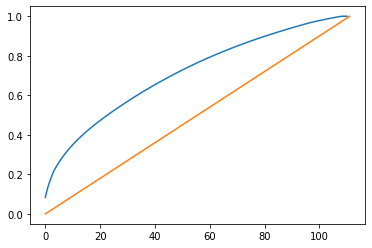

In [50]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.plot(np.linspace(0, pca.n_components_, 100),np.linspace(0,1,100))
for n, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
#     print(f"{n+1} comps, ratio = {ratio:.2f}")
    pass

~~Looks like about 30 dimensions is required for 95% of the variance.~~
Only true before I scaled, makes sense cus PCA can just hit the large dimensions first ;(  
Will use 30 anyways, cus after that, dimensions add less than if uncorrelated.


Now want to look at the components to see if they align with the hand-picked ones in Freedom Rising. Have checked that components are magnitude 1.

In [44]:
pca = PCA(30)
X_pca = pca.fit_transform(X_scaled)

In [45]:
for n, component in enumerate(pca.components_):
    print(f"Component {n}")
    indices = np.abs(component).argsort()[::-1][:8]
    for i in indices:
        column_name = columns_X[i]
        val = component[i]
        print(f"{column_name}, val {val:.3f}", end = "")
        if column_name in questions.keys():
            question = questions[column_name]
            print(f", {question}", end = "")
        print("")
    print("")

Component 0
Q6, val 0.227, Important in life: Religion
Q164, val -0.223, Importance of God
Q184, val 0.215, Justifiable: Abortion
Q172R, val 0.204, How often to you pray
Q185, val 0.202, Justifiable: Divorce
Q33, val 0.201, Jobs scarce: Men should have more right to a job than women
Q37, val 0.187, Duty towards society to have children
Q27, val 0.178, One of main goals in life has been to make my parents proud

Component 1
Q73, val -0.275, Confidence: Parliament
Q71, val -0.264, Confidence: The Government
Q72, val -0.252, Confidence: The Political Parties
Q70, val -0.251, Confidence: Justice System/Courts
Q74, val -0.245, Confidence: The Civil Services
Q69, val -0.221, Confidence: The Police
Q252, val 0.220, Satisfaction with the political system performance
Q251, val 0.210, How democratically is this country being governed today

Component 2
Q94R, val 0.258, Membership: Church or religious organization
Q101R, val 0.250, Membership: Charitable/humanitarian organization
Q96R, val 0.241,

Fuck yeah looks good. Note that Q6 religion is coded backwards, low vals are more religious. And many others.

In [227]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca[:10000,:10])

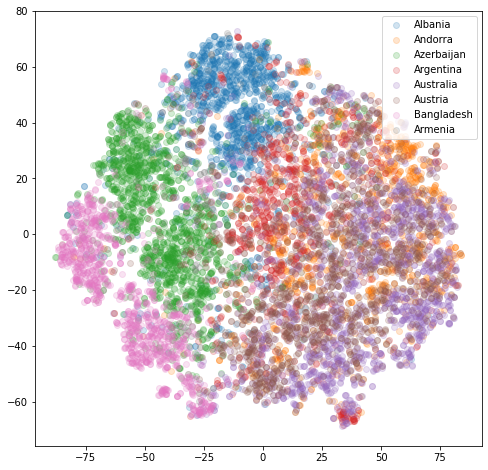

In [233]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

for country in Y[:10000].unique():
    d = X_tsne[Y[:10000] == country]
    ax.scatter(d[:,0],d[:,1], label = alpha_to_name(country), alpha = 0.2)
    
ax.legend()

In [301]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

n_list = []
inertias = []
silhouettes = []

# for n in np.geomspace(1,500, 15, dtype = np.int):
#     print(n)
# #     km = KMeans(n)
#     km = MiniBatchKMeans(n)
#     km.fit(X_pca)
#     n_list.append(n)
#     inertias.append(km.inertia_)

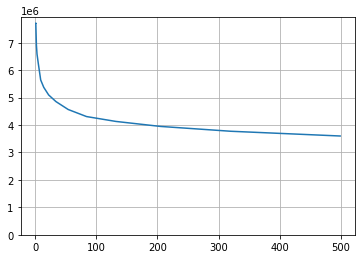

In [255]:
plt.plot(n_list, inertias)
plt.gca().set_ylim(0,None)
plt.grid()

Alright, so looks like there are 50 or so different political opinions.

In [302]:
km = KMeans(n_clusters = 50)
X_km = km.fit_transform(X_pca)

In [303]:
[(c,alpha_to_name(c)) for c in Y.unique()]

[('ALB', 'Albania'),
 ('AND', 'Andorra'),
 ('AZE', 'Azerbaijan'),
 ('ARG', 'Argentina'),
 ('AUS', 'Australia'),
 ('AUT', 'Austria'),
 ('BGD', 'Bangladesh'),
 ('ARM', 'Armenia'),
 ('BOL', 'Bolivia, Plurinational State of'),
 ('BIH', 'Bosnia and Herzegovina'),
 ('BRA', 'Brazil'),
 ('BGR', 'Bulgaria'),
 ('MMR', 'Myanmar'),
 ('BLR', 'Belarus'),
 ('CHL', 'Chile'),
 ('CHN', 'China'),
 ('TWN', 'Taiwan, Province of China'),
 ('COL', 'Colombia'),
 ('HRV', 'Croatia'),
 ('CYP', 'Cyprus'),
 ('CZE', 'Czechia'),
 ('DNK', 'Denmark'),
 ('ECU', 'Ecuador'),
 ('ETH', 'Ethiopia'),
 ('EST', 'Estonia'),
 ('FIN', 'Finland'),
 ('FRA', 'France'),
 ('GEO', 'Georgia'),
 ('DEU', 'Germany'),
 ('GRC', 'Greece'),
 ('GTM', 'Guatemala'),
 ('HKG', 'Hong Kong'),
 ('HUN', 'Hungary'),
 ('ISL', 'Iceland'),
 ('IDN', 'Indonesia'),
 ('IRN', 'Iran, Islamic Republic of'),
 ('IRQ', 'Iraq'),
 ('ITA', 'Italy'),
 ('JPN', 'Japan'),
 ('KAZ', 'Kazakhstan'),
 ('JOR', 'Jordan'),
 ('KOR', 'Korea, Republic of'),
 ('KGZ', 'Kyrgyzstan'),
 (

So now, want to see which clusters a country most belongs to. Then look at what those cluster's properties are. And look at what countries these clusters also house.

In [76]:
def get_sorted_cluster_frequency(country):
    d = np.array(np.unique(km.labels_[Y == country], return_counts = True))
    sort = np.argsort(d[1,:])[::-1]
    return d.T[sort]

def get_cluster_frequency(country):
    d = np.bincount(km.labels_[Y == country], minlength = km.n_clusters)
    return d

In [77]:
def get_cluster_answers(cluster_id):
    c = km.cluster_centers_[cluster_id]
    x = pca.inverse_transform(c)
    return x 
    
def explain_answers(x, N = 10):
    indices = np.abs(x).argsort()[::-1][:N]
    unscaled = scaler.inverse_transform(x)
    for i in indices:
        column_name = columns_X[i]
        val = x[i]
        raw = unscaled[i]
        print(f"{column_name}, val {val:.2f}, raw = {raw:.2f}", end = "")
        if column_name in questions.keys():
            question = questions[column_name]
            print(f", {question}", end = "")
        print("")
    print("")

def get_sorted_cluster_countries(cluster_id):
    ids = np.argwhere(km.labels_ == cluster_id).T[0]
    countries = Y[ids]
    d = np.array(np.unique(countries, return_counts = True))
    sort = np.argsort(d[1,:])[::-1]
    return d.T[sort]

def get_cluster_countries(cluster_id):
    out = {}
    for country in Y.unique():
        num = (Y[km.labels_ == cluster_id] == country).sum()
        out[country] = num
    return out
    

In [69]:
explain_answers(get_cluster_answers(46))

Q99R, val 1.59, raw = 0.59, Membership: Environmental organization
Q100R, val 1.52, raw = 0.64, Membership: Professional organization
Q101R, val 1.51, raw = 0.67, Membership: Charitable/humanitarian organization
Q102R, val 1.48, raw = 0.48, Membership: Consumer organization
Q96R, val 1.45, raw = 0.70, Membership: Art, music, educational organization
Q103R, val 1.41, raw = 0.51, Membership: Self-help group, mutual aid group
Q98R, val 1.31, raw = 0.50, Membership: Political party
Q97R, val 1.23, raw = 0.58, Membership: Labor union
Q95R, val 1.20, raw = 0.73, Membership: Sport or recreational organization
Q211, val -0.82, raw = 1.73, Political action: attending lawful/peaceful demonstrations



In [342]:
explain_answers(get_cluster_answers(44))

Q289_7.0, val 2.52, raw = 0.50
Q19, val -1.40, raw = 1.33, Neighbors: ok with people of a different race
Q259, val 1.36, raw = 3.78, Feel close to the world
Q21, val -1.26, raw = 1.25, Neighbors: ok with immigrants/foreign workers
Q258, val 1.26, raw = 3.58, Feel close to your continent
Q72, val -0.86, raw = 2.30, Confidence: The Political Parties
Q275, val -0.83, raw = 2.01, Highest educational level: Respondent [ISCED 2011]
Q270, val 0.77, raw = 5.01, Number of people in household
Q252, val 0.71, raw = 7.13, Satisfaction with the political system performance
Q71, val -0.70, raw = 2.02, Confidence: The Government



<AxesSubplot:xlabel='Q19'>

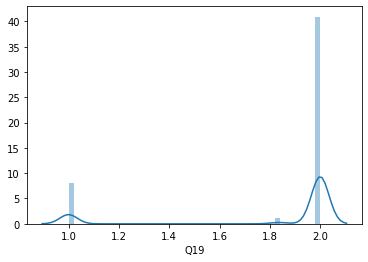

In [349]:
sns.distplot(X["Q19"])

In [337]:
get_sorted_cluster_frequency("CHN")[:10]

array([[  22, 2006],
       [  24,  388],
       [  44,  178],
       [  45,  162],
       [   8,   33],
       [  18,   33],
       [   0,   29],
       [  38,   22],
       [  33,   20],
       [   2,   20]])

In [159]:
get_sorted_cluster_countries(10)[:10]

array([['DEU', 384],
       ['NLD', 373],
       ['CHE', 284],
       ['GBR', 223],
       ['FRA', 187],
       ['AUS', 179],
       ['AUT', 126],
       ['SWE', 126],
       ['DNK', 120],
       ['NZL', 118]], dtype=object)

In [161]:
# get_cluster_countries(10)

In [72]:
tsne = TSNE()
centers_tsne = tsne.fit_transform(km.cluster_centers_)

In [73]:
# tsne = TSNE()
# tsne_fit_data = np.concatenate((km.cluster_centers_, X_pca[::100]))
# centers_tsne = tsne.fit_transform(tsne_fit_data)[:km.n_clusters]


In [74]:
# X_lle = lle.transform(X_pca)
# centers_lle = lle.transform(km.cluster_centers_)


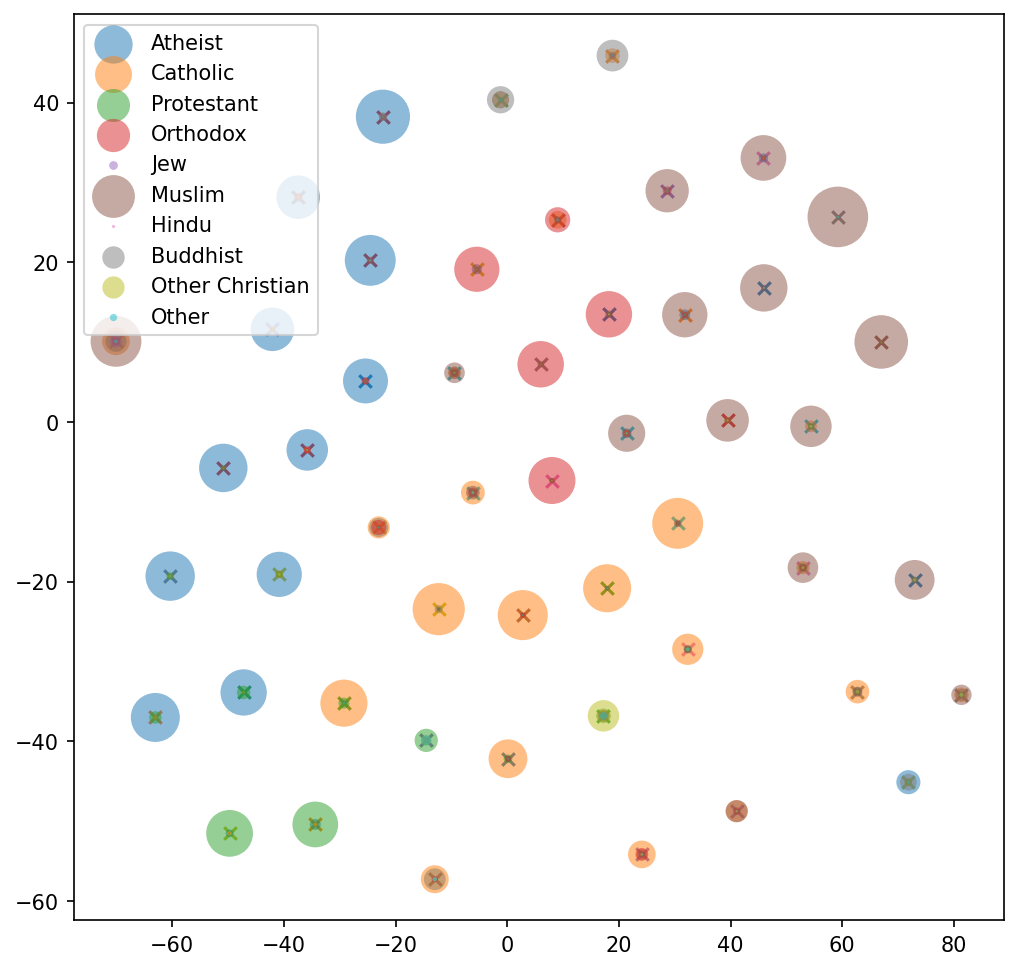

In [78]:
fig = plt.figure(figsize = (8,8), dpi = 150)
ax = fig.add_subplot(111)

# for country in Y.unique():
#     d = X_lle[Y == country]
#     ax.scatter(d[:,0],d[:,1], label = alpha_to_name(country), alpha = 0.2)
    
for center in centers_tsne:
    ax.scatter(center[0], center[1], marker = "x")

cool_countries = ["GBR","USA","CHN","RUS","JPN","PAK"]
# cool_countries = Y.unique()[1::10]

for country in cool_countries:
    frequencies = get_cluster_frequency(country) #How many citizens in each cluster)
#     plt.scatter(centers_tsne[:,0], centers_tsne[:,1], s = frequencies, label = country)


religion_names_master = ["Atheist","Catholic","Protestant","Orthodox","Jew","Muslim",
                         "Hindu","Buddhist","Other Christian","Other"]
religion_lookup = {f"Q289_{n}.0":name for n, name in enumerate(religion_names_master)}

# ax.set_xlim(-50,50)
# ax.set_ylim(-50,50)

#Plot emancipative
emanc_means = []
sec_means = []
for n in range(km.n_clusters):
    x = df_D[km.labels_ == n]
    emanc_means.append(x["RESEMAVAL"].mean())
    sec_means.append(x["SACSECVAL"].mean())

emanc_means = np.array(emanc_means)
sec_means = np.array(sec_means)
# ax.scatter(centers_tsne[:,0], centers_tsne[:,1], s = 1000*emanc_means, label = "emanc", alpha = 0.5, lw = 0)
# ax.scatter(centers_tsne[:,0], centers_tsne[:,1], s = 1000*sec_means, label = "sec", alpha = 0.5, lw = 0)


# Plot religions
for r in range(0,10):
    religion_values = []
    for n, center in enumerate(km.cluster_centers_):
        x = pca.inverse_transform(center)
        x = scaler.inverse_transform(x)
        val = x[-18+r] #HACK HACK HACK HACK HACK HACK HACK HACK HACK HACK HACK HACK HACK BUG BUG BUG BUG
        col_name = X.columns[-18+r]
        val = max(0,val)
        religion_values.append(val)    
    religion_values = np.array(religion_values)
    label = religion_lookup[col_name]
    ax.scatter(centers_tsne[:,0], centers_tsne[:,1], s = 1000*religion_values**2, label = label, alpha = 0.5, lw = 0)

    
        
ax.legend()

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       ...
       'Q289_8.0', 'Q289_9.0', 'Q152_1.0', 'Q152_2.0', 'Q152_3.0', 'Q152_4.0',
       'Q154_1.0', 'Q154_2.0', 'Q154_3.0', 'Q154_4.0'],
      dtype='object', length=116)

In [253]:
list(X.columns)

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q21',
 'Q24',
 'Q27',
 'Q28',
 'Q29',
 'Q30',
 'Q31',
 'Q33',
 'Q34',
 'Q37',
 'Q38',
 'Q39',
 'Q40',
 'Q41',
 'Q43',
 'Q46',
 'Q47',
 'Q48',
 'Q49',
 'Q57',
 'Q58',
 'Q59',
 'Q60',
 'Q61',
 'Q64',
 'Q66',
 'Q69',
 'Q70',
 'Q71',
 'Q72',
 'Q73',
 'Q74',
 'Q94R',
 'Q95R',
 'Q96R',
 'Q97R',
 'Q98R',
 'Q99R',
 'Q100R',
 'Q101R',
 'Q102R',
 'Q103R',
 'Q106',
 'Q108',
 'Q109',
 'Q121',
 'Q164',
 'Q171',
 'Q172R',
 'Q173',
 'Q177',
 'Q178',
 'Q180',
 'Q181',
 'Q184',
 'Q185',
 'Q187',
 'Q195',
 'Q196',
 'Q198',
 'Q199',
 'Q209',
 'Q211',
 'Q221',
 'Q250',
 'Q251',
 'Q252',
 'Q254',
 'Q255',
 'Q256',
 'Q257',
 'Q258',
 'Q259',
 'Q262',
 'Q263',
 'Q270',
 'Q274',
 'Q275',
 'Q289_0.0',
 'Q289_1.0',
 'Q289_2.0',
 'Q289_3.0',
 'Q289_4.0',
 'Q289_5.0',
 'Q289_6.0',
 'Q289_7.0',
 'Q289_8.0',
 'Q289_9.0',
 'Q260_1.0',
 'Q260_2.0',
 'Q152_1.0',
 'Q152_2.0',


## Saving for d3

In [388]:

#Need to list those variables to _not_ reverse, since most of them are backwards it seems lol

not_reversed = ["Q48","Q49","Q94R", "Q121", "Q152_1.0", "Q152_2.0", "Q152_3.0", "Q152_4.0"
               , "Q154_1.0", "Q154_2.0", "Q154_3.0", "Q154_4.0", "Q164", "Q263","Q264","Q265","Q274","Q275","Q270"]

not_reversed += [f"Q{n}" for n in range(18,24)] #Change questions to "wouldn't mind X group"
not_reversed += [f"Q{n}R" for n in range(94,106)]
not_reversed += [f"Q{n}" for n in range(177,196)] #Added 177, 178 in out of suspiscioun
not_reversed += [f"Q{n}" for n in range(241,254)]
not_reversed += [f"Q289_{n}.0" for n in range(0,10)]
not_reversed += [f"Q260_{n}.0" for n in range(0,2)] #Was sex, but not OH-ed any more
not_reversed += [f"Q152_{n}.0" for n in range(0,5)]
not_reversed += [f"Q154_{n}.0" for n in range(0,5)]


In [64]:
import json
from sklearn.preprocessing import MinMaxScaler

#Save all cluster locations
#Will map them all


centers_to_save = MinMaxScaler().fit_transform(centers_tsne)
emanc_x = MinMaxScaler().fit_transform(emanc_means[:,None])
sec_x = MinMaxScaler().fit_transform(sec_means[:,None])


cluster_dict = []

all_Q_labels = {**questions,**religion_lookup,**{"Q260_1.0":"Male", "Q260_2.0":"Female"},
               **{"Q152_1.0":"Desired country aim: economic growth",
                 "Q152_2.0":"Desired country aim: strong defence forces",
                 "Q152_3.0":"Desired country aim: individuals have more influence",
                 "Q152_4.0":"Desired country aim: more beautiful cities and countryside"},
               **{"Q154_1.0":"Most important: Maintaining order",
                 "Q154_2.0":"Most important: Having more say in government decisions",
                  "Q154_3.0":"Most important: Fighting rising prices",
                  "Q154_4.0":"Most important: Protecting freedom of speech"}
                 }

country_totals = {country:(Y == country).sum() for country in Y.unique()}
country_true_pop = {country:df[Y == country]["popWB2019"].iloc[0] for country in Y.unique()}
country_true_pop["TWN"] = 23780000

for cluster_id, center in enumerate(centers_to_save):
    country_pop = get_cluster_countries(cluster_id)
    country_pop = {key:str(country_pop[key]) for key in country_pop.keys()}
    country_pop_fraction = {key:float(country_pop[key])/country_totals[key] for key in country_pop.keys()}
    country_pop_true = {key:int(country_pop_fraction[key] * country_true_pop[key]) for key in country_pop.keys()}
    
    
    scaled_answers = get_cluster_answers(cluster_id)
#     scaled_answers = [str(ans) for ans in scaled_answers]
    
    scaled_answers = [str(scaled_answers[n] * (1 if col in not_reversed else -1)) for (n, col) in enumerate(X.columns)]
    
#     answer_dict = dict(zip(X.columns, scaled_answers))
    
    answer_list = [{"Q":q,"question":all_Q_labels[q], "answer":scaled_answers[n]} for (n,q) in enumerate(X.columns)]
    
    cluster_dict.append({"id":str(int(cluster_id)),
                                "x":str(center[0]),
                                "y":str(center[1]),
                                 "x_emanc":str(emanc_x[cluster_id,0]),
                                 "x_sec":str(sec_x[cluster_id,0]),
                                "countries":country_pop,
                                 "countries_fraction":country_pop_fraction,
                                 "countries_true":country_pop_true,
                                "answers":answer_list})
    
    
# with open('./jsons/cluster_data.json', 'w') as outfile:
#     json.dump(cluster_dict, outfile, indent = 4)

NameError: name 'centers_tsne' is not defined

In [66]:
#Save country list

countries = Y.unique().astype(np.str)
real_names = [alpha_to_name(country) for country in countries]

regionWB = [df[Y == code]["regionWB"].iloc[0] for code in countries]
lookup_ = ["ssafrica","sasia","namerica","meast_nafrica","latin_carib","europe_casia","easia"]
regionWB = [lookup_[int(n) -1] for n in regionWB]

country_json = [{"code":countries[n], "name":real_names[n], "region":regionWB[n]} for n in range(len(countries))]



df[["COUNTRY_CODE","regionWB"]]
with open('./jsons/country_data.json', 'w') as outfile:
    json.dump(country_json, outfile, indent = 4)

In [62]:
list(zip(regionWB,real_names))

[('europe_casia', 'Albania'),
 ('europe_casia', 'Andorra'),
 ('europe_casia', 'Azerbaijan'),
 ('latin_carib', 'Argentina'),
 ('easia', 'Australia'),
 ('europe_casia', 'Austria'),
 ('sasia', 'Bangladesh'),
 ('europe_casia', 'Armenia'),
 ('latin_carib', 'Bolivia, Plurinational State of'),
 ('europe_casia', 'Bosnia and Herzegovina'),
 ('latin_carib', 'Brazil'),
 ('europe_casia', 'Bulgaria'),
 ('easia', 'Myanmar'),
 ('europe_casia', 'Belarus'),
 ('latin_carib', 'Chile'),
 ('easia', 'China'),
 ('easia', 'Taiwan, Province of China'),
 ('latin_carib', 'Colombia'),
 ('europe_casia', 'Croatia'),
 ('europe_casia', 'Cyprus'),
 ('europe_casia', 'Czechia'),
 ('europe_casia', 'Denmark'),
 ('latin_carib', 'Ecuador'),
 ('ssafrica', 'Ethiopia'),
 ('europe_casia', 'Estonia'),
 ('europe_casia', 'Finland'),
 ('europe_casia', 'France'),
 ('europe_casia', 'Georgia'),
 ('europe_casia', 'Germany'),
 ('europe_casia', 'Greece'),
 ('latin_carib', 'Guatemala'),
 ('easia', 'Hong Kong'),
 ('europe_casia', 'Hungary'

### Also just trying to decompose into 2-dim PCA like he did 

In [201]:
pca2 = PCA(2)
country_centers = [X_scaled[Y == country].mean(axis = 0) for country in Y.unique()]
country_centers_pca2 = pca2.fit_transform(country_centers)

No handles with labels found to put in legend.


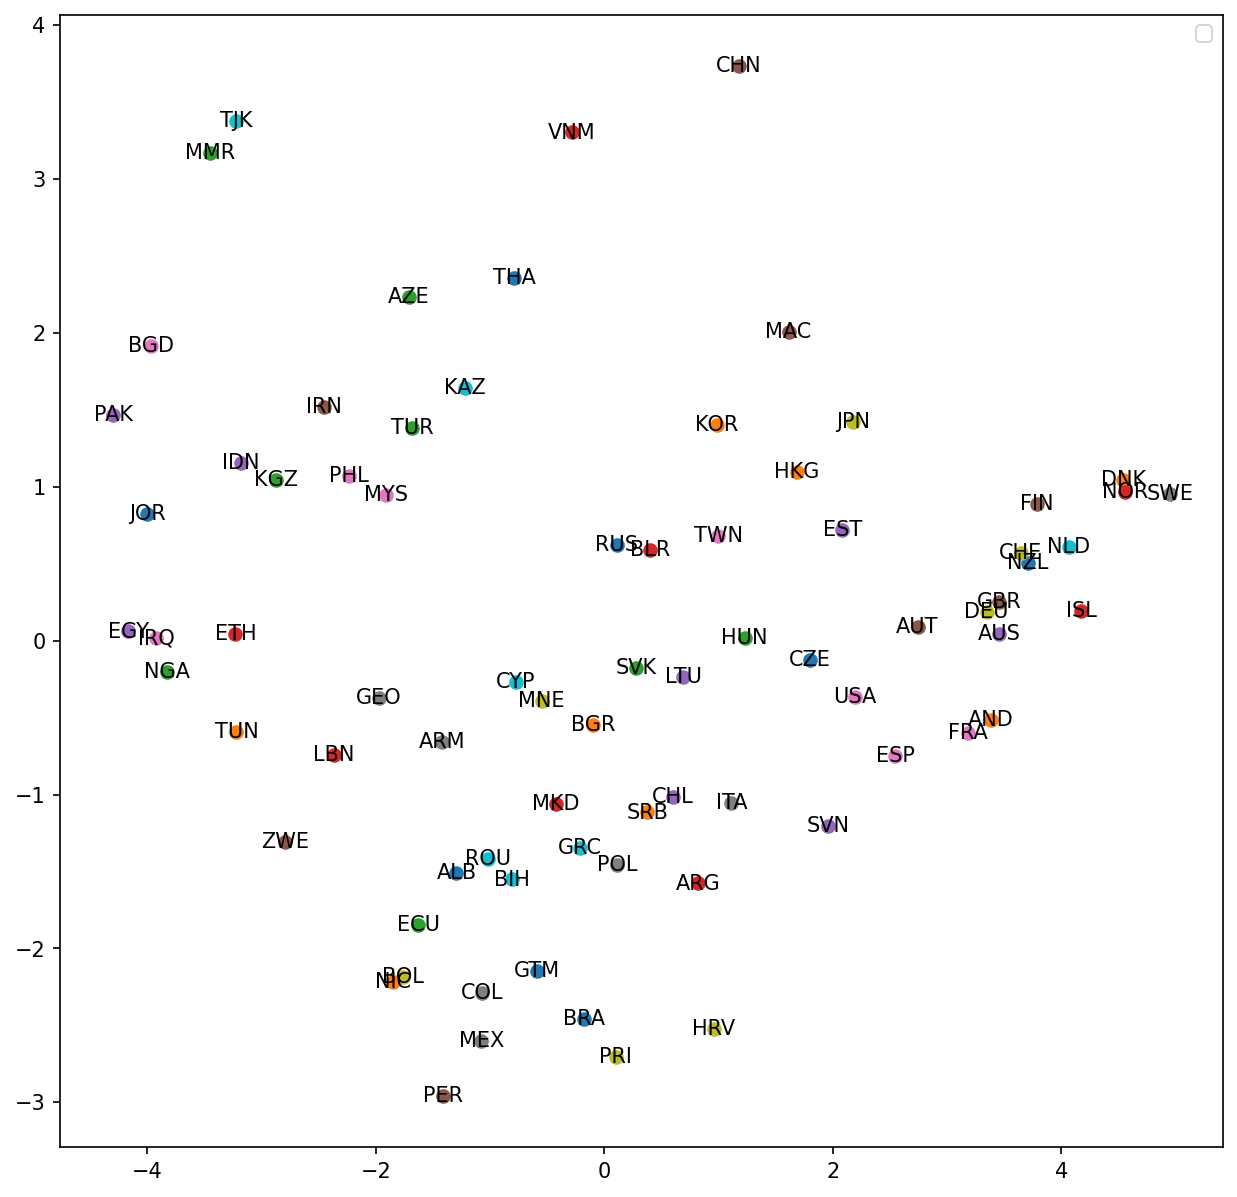

In [220]:
fig = plt.figure(figsize = (10,10), dpi = 150)
for n, country in enumerate(Y.unique()):
#     if country not in cool_countries: continue
    x = country_centers_pca2[n]
    plt.scatter(x[0],x[1])
    plt.text(x[0],x[1], country, ha = "center", va = "center")
    
#     x = pca2.transform(X_scaled[Y == country])
#     plt.scatter(x[:,0], x[:,1], label = country, alpha = 0.5, lw = 0, s = 5)
    
plt.gca().legend()

{'Q_MODE': 'Mode of data collection',
 'Q1': 'Important in life: Family',
 'Q2': 'Important in life: Friends',
 'Q3': 'Important in life: Leisure time',
 'Q4': 'Important in life: Politics',
 'Q5': 'Important in life: Work',
 'Q6': 'Important in life: Religion',
 'Q7': 'Important child qualities: Good manners',
 'Q8': 'Important child qualities: Independence',
 'Q9': 'Important child qualities: Hard work',
 'Q10': 'Important child qualities: Feeling of responsibility',
 'Q11': 'Important child qualities: Imagination',
 'Q12': 'Important child qualities: Tolerance and respect for other people',
 'Q13': 'Important child qualities: Thrift saving money and things',
 'Q14': 'Important child qualities: Determination perseverance',
 'Q15': 'Important child qualities: Religious faith',
 'Q16': 'Important child qualities: Unselfishness',
 'Q17': 'Important child qualities: Obedience',
 'Q18': 'Neighbors: Drug addicts',
 'Q19': 'Neighbors: People of a different race',
 'Q21': 'Neighbors: Immigra

In [233]:
X.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       ...
       'Q289_2.0', 'Q289_3.0', 'Q289_4.0', 'Q289_5.0', 'Q289_6.0', 'Q289_7.0',
       'Q289_8.0', 'Q289_9.0', 'Q260_1.0', 'Q260_2.0'],
      dtype='object', length=111)

In [266]:
# for country in Y.unique():
#     m = X[Y == country]["Q60"].mean()
#     print(country, f"{m:.2f}")

In [263]:
X["Q60"].mean()

1.9751997484499841

<AxesSubplot:xlabel='Q60'>

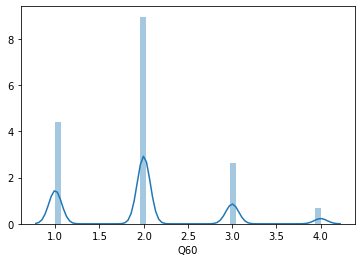

In [264]:
sns.distplot(X["Q60"])

<AxesSubplot:xlabel='Q6'>

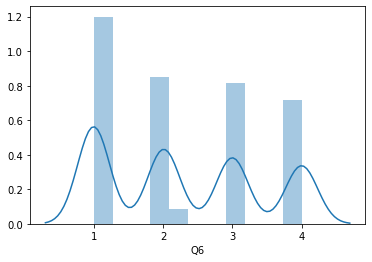

In [403]:
sns.distplot(X[Y == "USA"]["Q6"])

In [285]:
"Q1" in not_reversed

False

In [383]:
df_D.columns

Index(['Y002', 'Y003', 'SACSECVAL', 'RESEMAVAL', 'I_AUTHORITY',
       'I_NATIONALISM', 'I_DEVOUT', 'DEFIANCE', 'I_RELIGIMP', 'I_RELIGBEL',
       'I_RELIGPRAC', 'DISBELIEF', 'I_NORM1', 'I_NORM2', 'I_NORM3',
       'RELATIVISM', 'I_TRUSTARMY', 'I_TRUSTPOLICE', 'I_TRUSTCOURTS',
       'SCEPTICISM', 'I_INDEP', 'I_IMAGIN', 'I_NONOBED', 'AUTONOMY',
       'I_WOMJOB', 'I_WOMPOL', 'I_WOMEDU', 'EQUALITY', 'I_HOMOLIB',
       'I_ABORTLIB', 'I_DIVORLIB', 'CHOICE', 'I_VOICE1', 'I_VOICE2',
       'I_VOI2_00', 'VOICE', 'COUNTRY_CODE'],
      dtype='object')

<AxesSubplot:xlabel='SACSECVAL', ylabel='RESEMAVAL'>

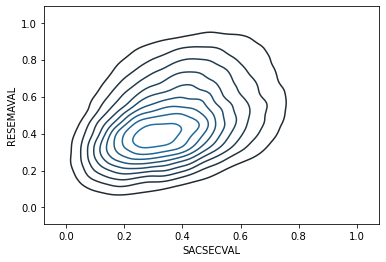

In [396]:
sns.kdeplot(df_D.dropna()["SACSECVAL"], df_D.dropna()["RESEMAVAL"])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


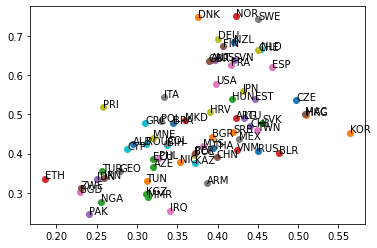

In [399]:
for country in Y.unique():
    x = df_D[Y == country]
    sac = x.dropna()["SACSECVAL"].mean()
    emanc = x.dropna()["RESEMAVAL"].mean()
    plt.text(sac,emanc, country)
    plt.scatter(sac,emanc)
    

In [402]:
df_Q[Y == "USA"]["Q289"].value_counts()

0.0    1148
2.0     583
1.0     509
9.0     175
4.0      46
7.0      27
6.0      15
3.0      15
5.0      15
Name: Q289, dtype: int64

In [50]:
df[["COUNTRY_CODE","regionWB"]]

COUNTRY_CODE  regionWB
1               ALB       6.0
2               ALB       6.0
3               ALB       6.0
4               ALB       6.0
5               ALB       6.0
...             ...       ...
124848          USA       3.0
124849          USA       3.0
124850          USA       3.0
124851          USA       3.0
124852          USA       3.0

[124852 rows x 2 columns]